In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [68]:
mnist_test_data = pd.read_csv('/content/drive/My Drive/Test/3/mnist_test.csv', header = None, skiprows = 1, usecols = range(1, 785))
mnist_test_label = pd.read_csv('/content/drive/My Drive/Test/3/mnist_test.csv', header = None, skiprows = 1, usecols = range(0, 1))
mnist_train_data = pd.read_csv('/content/drive/My Drive/Test/3/mnist_train.csv', header = None, skiprows = 1, usecols = range(1, 785))
mnist_train_label = pd.read_csv('/content/drive/My Drive/Test/3/mnist_train.csv', header = None, skiprows = 1, usecols = range(0, 1))

In [69]:
mnist_test_data_np = mnist_test_data.to_numpy()
mnist_test_label_np = mnist_test_label.to_numpy()
mnist_train_data_np = mnist_train_data.to_numpy()
mnist_train_label_np = mnist_train_label.to_numpy()

In [70]:
train_label = np.zeros(60000)
for i in range(60000):
  if (mnist_train_label_np[i] == 0):
    train_label[i] = 1
  else:
    train_label[i] = -1

In [75]:
test_label = np.zeros(10000)
for i in range(10000):
  if (mnist_test_label_np[i] == 0):
    test_label[i] = 1
  else:
    test_label[i] = -1

In [76]:
def Loss_Gradient(w, x, landa, y, n, b):
  res = np.multiply(2, landa)
  res = np.multiply(res, w)
  if (max(0, (1 - np.multiply(y, (np.dot(np.transpose(w), x) - b))) == 0)):
    return res
  else:
    return (res - np.multiply(x, y/n))

In [77]:
def Weight(w, eta, loss_gradient):
  return (w - np.multiply(eta, loss_gradient))

In [30]:
def Bias(x, y, w):
  return (np.dot(np.transpose(w), x) - (1/y))

In [51]:
def Train(D, D_label, w, eta, n, landa):
  dim = D.shape
  b = Bias(D[0], D_label[0], w)
  for i in range(dim[0]):
    b = Bias(D[i], D_label[i], w)
    loss_gradient = Loss_Gradient(w, D[i], landa, D_label[i], n, b)
    w = Weight(w, eta, loss_gradient)
  return (w, b)

In [32]:
def Test(D, w, b):
  predicted_labels = []
  for i in range((D.shape)[0]):
    predicted_labels.append(np.dot(np.transpose(w), D[i]) - b)
  return predicted_labels

In [98]:
def Accuracy(predicted_labels, labels):
  count = 0
  dim = labels.shape
  for i in range(dim[0]):
    if (predicted_labels[i] > labels[i]):
      count += 1
  count = count / dim[0]
  return count

In [34]:
def Cross_Validation(D, D_label, landa, w, eta):
  accuracy = 0
  D_train = D
  D_label1 = D_label
  temp = np.array(range(6000))
  for i in range(10):
    D_train = np.delete(D, 6000*i + temp, 0)
    D_label1 = np.delete(D_label, 6000*i + temp, 0)
    w, b = Train(D_train, D_label1, w, eta, 54000, landa)
    predicted_labels = Test(D[6000*i:(6000*(i+1))], w, b)
    accuracy += Accuracy(predicted_labels, D_label[6000*i:6000*i+6000])
  return accuracy

In [43]:
mu = 0
sigma = 0.1
eta = 0.01
w = np.random.normal(mu, sigma, 28*28)
landa = np.array([pow(10, -10), pow(10, -8), pow(10, -6), pow(10, -4), pow(10, -2), 1])

In [44]:
accuracy = []
for i in landa:
  accuracy.append(Cross_Validation(np.array(mnist_train_data_np), train_label, i, w, eta))
res = np.amax(accuracy)
print(accuracy)
print(res)

[9.213333333333333, 9.2215, 9.212166666666667, 9.141833333333334, 0.5575, 3.5163333333333338]
9.2215


As we can see landa = pow(10, -8) has the best accuracy.

In [92]:
def Loss(x, y, landa, w, b, n):
  res = (np.multiply(np.inner(w, w), landa))
  for i in range(n):
    res += np.multiply(n, max(0, (1 - np.multiply(y[i], (np.dot(np.transpose(w), x[i]) - b)))))
  return res

In [99]:
mu = 0
sigma = 0.1
eta = 0.01
w = np.random.normal(mu, sigma, 28*28)
loss_sgd = np.zeros(10)
train_accuracy = np.zeros(10)
test_accuracy = np.zeros(10)
for i in range(10):
  w , b = Train(mnist_train_data_np[i:(i+1)*6000], train_label[i:(i+1)*6000], w, eta, 6000, landa[1])
  predicted_train_labels = Test(mnist_train_data_np, w, b)
  loss_sgd[i] = Loss(mnist_train_data_np[0:(i+1)*6000], train_label[0:(i+1)*6000], landa[0], w, b, (i+1)*6000)
  predicted_test_labels = Test(mnist_test_data_np, w, b)
  test_accuracy[i] = Accuracy(predicted_test_labels, test_label)
  train_accuracy[i] = Accuracy(predicted_train_labels, train_label)

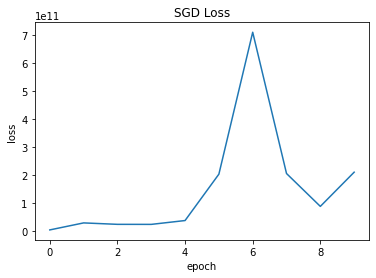

In [100]:
plt.title("SGD Loss") 
plt.xlabel("epoch") 
plt.ylabel("loss") 
plt.plot(range(10), loss_sgd) 
plt.show()

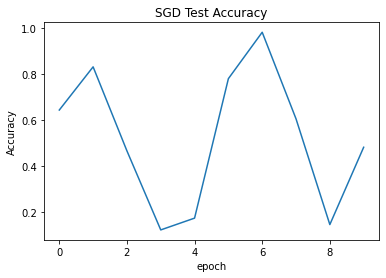

In [101]:
plt.title("SGD Test Accuracy") 
plt.xlabel("epoch") 
plt.ylabel("Accuracy") 
plt.plot(range(10), test_accuracy) 
plt.show()

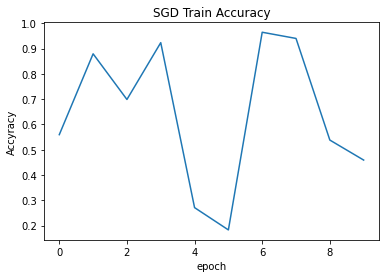

In [97]:
plt.title("SGD Train Accuracy") 
plt.xlabel("epoch") 
plt.ylabel("Accyracy") 
plt.plot(range(10), train_accuracy) 
plt.show()